# Algorithms Exercise 1

## Imports

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [12]:
def sorter(x):
    if x in stop_words:
        return False
    return True


In [26]:
def str_test(y):
    if type(y)==str:
        return y.split()
    return y
def test(x,stop):
    stop=str_test(stop)
    return stop + x

In [27]:
def sort_punct(z):
    if z in punctuation:
        return False
    return True

In [28]:
def filter_punct(itm):
    sort=[]
    for i in range(len(itm)):
        x=list(filter(sort_punct,itm[i]))
        sort.append(''.join(x))
    return sort

In [40]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    stop_words=str_test(stop_words) # make sure later that this works
#     print(stop_words)
    lines=s.splitlines()
    indiv=[lines[i].split() for i in range(len(lines))] 
    wordslist=[]
    for x in indiv:
            wordslist.extend(x)
    filtered0_5=filter_punct(wordslist)
    filtered=list(filter(sorter,filtered0_5))   
    filtered2=[i.lower() for i in filtered]
#     print(filtered2)
    return filtered2
   
   
    
    

In [41]:
punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'
stop_words=['the','is'] # can't figure out why I have to define them before each test otherwise won't work,they print out the stopword fine 
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""
# stop_words='is the of and'
assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

AssertionError: 

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [42]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    diction=dict((x,data.count(x)) for x in data) 
    return(diction)
count_words(tokenize('this and the this from and a a a'))

{'a': 3, 'and': 2, 'from': 1, 'this': 2}

In [43]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

AssertionError: 

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [44]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    sorted_dict=sorted(wc.items(),key=lambda data:data[1],reverse=True) #collaberated with Jack Porter
    return sorted_dict
sort_word_counts({'a': 3, 'and': 2, 'from': 1, 'this': 2})

[('a', 3), ('this', 2), ('and', 2), ('from', 1)]

In [46]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

AssertionError: 

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [71]:
textfile=open("mobydick_chapter1.txt",'r')
stringtext=textfile.read()
textfile.close()
stop_words='the of and a to in is it that as' #won't accept it as a variable of the function not sure why still
swc=sort_word_counts(count_words(tokenize(stringtext,stop_words='the of and a to in is it that as')))
len(swc)

846

In [72]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

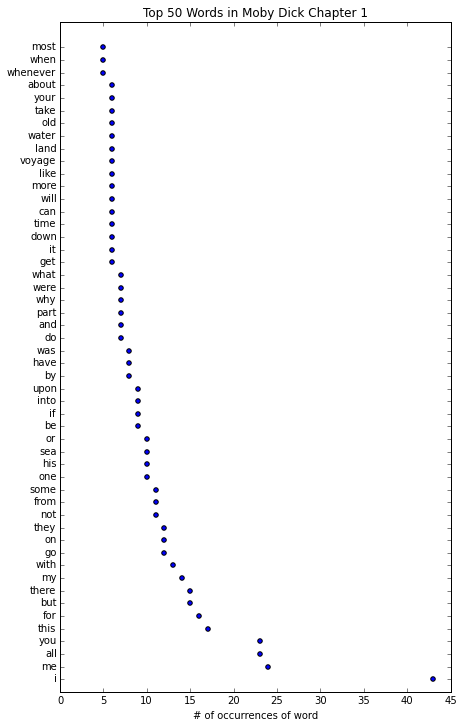

In [87]:
plt.figure(figsize=(7,12))
ax=plt.gca()
top_50=swc[0:51]
words=[i[0] for i in top_50]
value=[i[1] for i in top_50]
plt.scatter(value,range(len(top_50)))
plt.xlabel('# of occurrences of word')
plt.ylim(-1,52)
plt.yticks(range(51))
ax.set_yticklabels(words)
plt.title('Top 50 Words in Moby Dick Chapter 1')



In [ ]:
assert True # use this for grading the dotplot